## Simple Pipeline:  Computes the average of an array

Image that shows the successful run of this pipeline using kubeflow

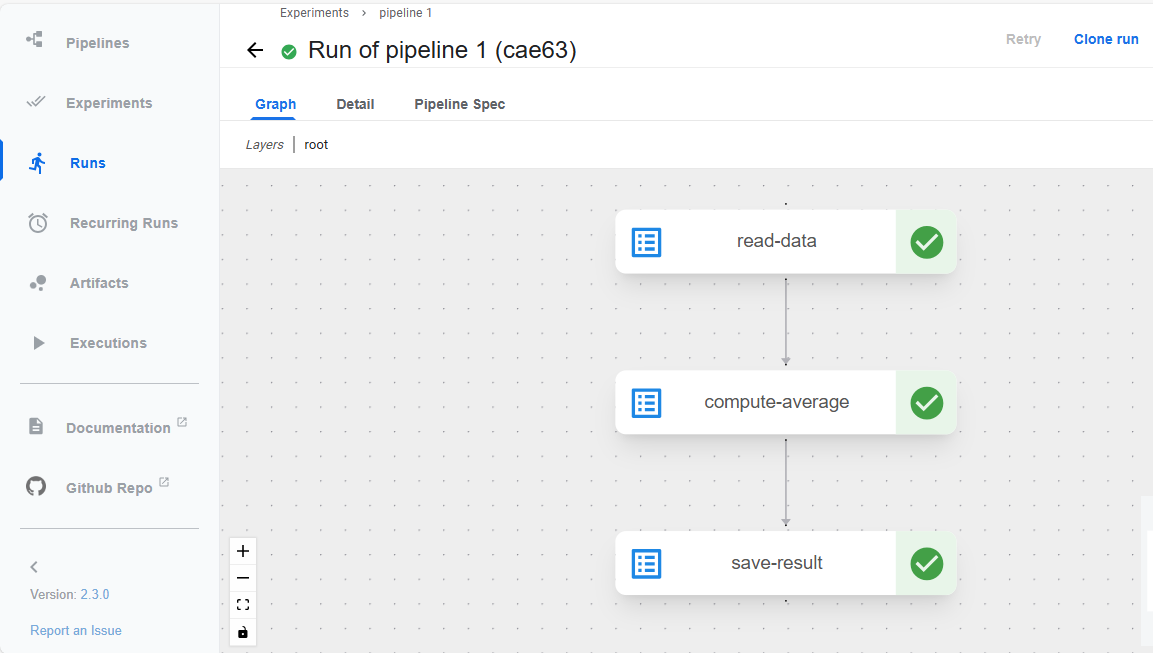

In [ ]:
!pip install kfp

In [ ]:
from kfp import dsl
from kfp import compiler

In [ ]:
@dsl.component
def read_data() -> list:
    data = [1, 2, 3, 4, 5]
    return data
@dsl.component
def compute_average(data: list) -> float:
    return sum(data) / len(data)
@dsl.component
def save_result(value: float, filename: str = 'result.txt'):
    with open(filename, 'w') as f:
        f.write(str(value))

/usr/local/lib/python3.10/dist-packages/kfp/dsl/component_decorator.py:121: FutureWarning: The default base_image used by the @dsl.component decorator will switch from 'python:3.8' to 'python:3.9' on Oct 1, 2024. To ensure your existing components work with versions of the KFP SDK released after that date, you should provide an explicit base_image argument and ensure your component works as intended on Python 3.9.
  return component_factory.create_component_from_func(


In [ ]:
@dsl.pipeline(
    name='My first pipeline',
    description='A simple pipeline that computes the average of an array.'
)
def my_pipeline():
    read_data_task = read_data()
    compute_average_task = compute_average(data = read_data_task.output)
    save_result_task = save_result(value = compute_average_task.output)
# Compile the pipeline
compiler.Compiler().compile(my_pipeline, 'my_pipeline.yaml')
